In [1]:
import numpy as np
import ipyvolume.pylab as plt3d
from scipy import optimize
import matplotlib.pyplot as plt

## $f(x,y)=(x-4)^2+(y-1)^2+100$, finding its minimal values

In [2]:
X = np.linspace(-5, 10, 100)  
Y = np.linspace(-5, 10, 100)  
X, Y = np.meshgrid(X, Y) 
Z = (X - 4)**2 + (Y - 1)**2 + 100

plt3d.figure()
plt3d.plot_surface(X, Z, Y, color="green")
plt3d.zlabel("y")
plt3d.ylabel("z")
plt3d.show()

## Gradient Descent

In [3]:
import sympy
sympy.init_printing()

x, y = sympy.symbols("x, y")
f_sym = (x - 4)**2 + (y-1)**2 + 100
f_mat = sympy.Matrix([f_sym])
f_grad_sym = f_mat.jacobian([x, y])
f_lamb = sympy.lambdify((x, y), f_sym, 'numpy')
fgrad_lamb = sympy.lambdify((x, y), f_grad_sym, 'numpy')

In [4]:
def func_XY_to_X_Y(f):
    return lambda X: np.array(f(X[0], X[1]))

In [5]:
f = func_XY_to_X_Y(f_lamb)
f_grad = func_XY_to_X_Y(fgrad_lamb)

### 1. Fixed Step Size

In [6]:
def gradient_descent_fixed_step(f, x0, step_size=0.01, tol=1e-5, num_epochs=100):
    x = np.zeros([num_epochs, 2])
    x[0] = x0
    for k in range(num_epochs -1 ):
        x[k+1] = x[k] - step_size * f_grad(x[k])
        if np.linalg.norm(f_grad(x[k+1])) < tol:
            print("The number of iteration: {}".format(k + 1))
            break
            
        if (k+1) > 1000 and (k+1) % 1000 ==0:
            print(k+1, x[k+1])
    
    return x[k+1], x[0:k+2]

In [10]:
def plot_gradient_descent_step(iter_value):
    plt.figure(figsize=(8, 8))
    plt.contour(X, Y, Z)
    for i, mini in enumerate(iter_value):
        plt.scatter(mini[0], mini[1], c='blue', alpha=0.8)
    plt.plot(iter_value[:,0], iter_value[:,1], 'black')
    plt.scatter(4., 1., marker="*", s=120, c="r", zorder=5)

step size = 1

In [15]:
mini0_1, minis0_1 = gradient_descent_fixed_step(f, np.array([-4, 9]), 
                                            step_size=1)
mini0_1

array([12., -7.])

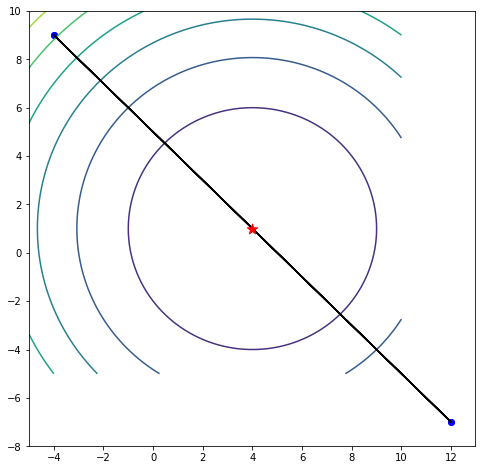

In [16]:
plot_gradient_descent_step(minis0_1[:5])

step size = 0.1

In [18]:
mini0_2, minis0_2 = gradient_descent_fixed_step(f, np.array([-4, 9]), 
                                            step_size=0.1)
mini0_2

The number of iteration: 66


array([3.99999679, 1.00000321])

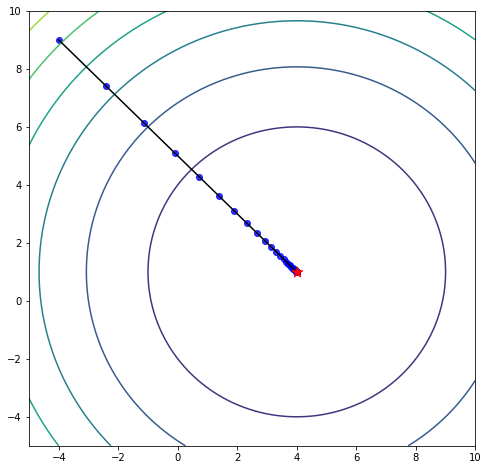

In [19]:
plot_gradient_descent_step(minis0_2)

step size = 0.01

In [20]:
mini0_3, minis0_3 = gradient_descent_fixed_step(f, np.array([-4, 9]), 
                                            step_size=0.01)
mini0_3

array([2.91739138, 2.08260862])

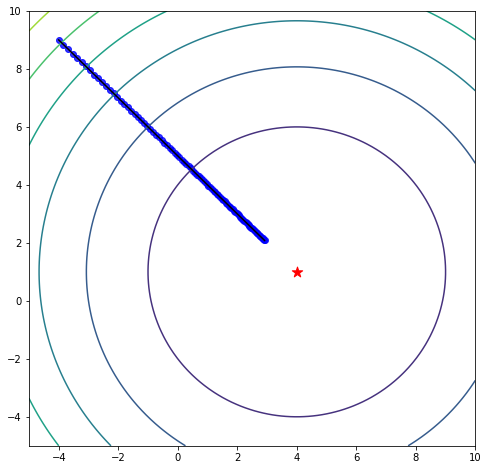

In [21]:
plot_gradient_descent_step(minis0_3)

step size = 0.01, max epochs = 800

In [22]:
mini0_4, minis0_4 = gradient_descent_fixed_step(f, np.array([-4, 9]), 
                                            step_size=0.01, num_epochs=800)
mini0_4

The number of iteration: 725


array([3.99999652, 1.00000348])

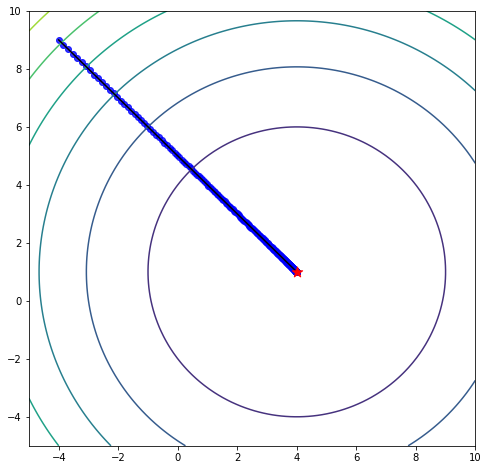

In [23]:
plot_gradient_descent_step(minis0_4)

### 2. Backtracking Line Search

In [24]:
def gradient_descent_backtracking(f, x0, alpha=0.1, beta=0.1, tol=1e-5, num_epochs=100):
    x = np.zeros([num_epochs, 2])
    x[0] = x0
    t0 = 1
    for k in range(num_epochs -1 ):
        t = beta * t0
        x[k+1] = x[k] - alpha * t * f_grad(x[k])
        if np.linalg.norm(f_grad(x[k+1])) < tol:
            print("The number of iteration: {}".format(k + 1))
            break
            
        if (k+1) > 1000 and (k+1) % 1000 ==0:
            print(k+1, x[k+1])
    
    return x[k+1], x[0:k+2]

In [25]:
mini1, minis1 = gradient_descent_backtracking(f, np.array([-4, 9]), 
                                              alpha=0.5, beta=0.5)
mini1

The number of iteration: 22


array([3.99999809, 1.00000191])

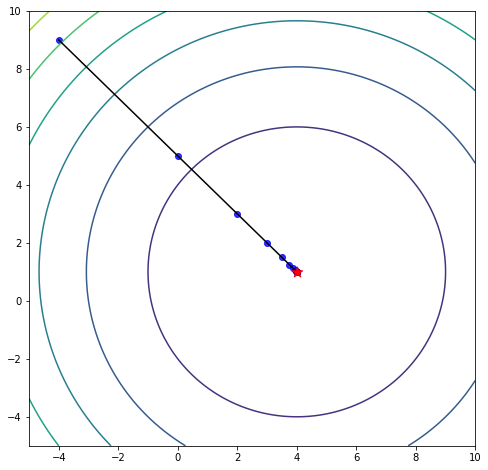

In [26]:
plot_gradient_descent_step(minis1)

### 3. Exact Line Search

In [27]:
def gradient_descent_exact(f, x0, tol=1e-5, num_epochs=100):
    x = np.zeros([num_epochs, 2])
    x[0] = x0
    for k in range(num_epochs -1 ):
        g = lambda t: f((x[k] - t *  f_grad(x[k]))[0])
        t_r = optimize.minimize_scalar(g)
        x[k+1] = x[k] - t_r['x'] * f_grad(x[k])
        if np.linalg.norm(f_grad(x[k+1])) < tol:
            print("The number of iteration: {}".format(k + 1))
            break
            
        if (k+1) > 1000 and (k+1) % 1000 ==0:
            print(k+1, x[k+1])
    
    return x[k+1], x[0:k+2]

In [28]:
mini2, minis2 = gradient_descent_exact(f, np.array([-4, 9]))
mini2

The number of iteration: 1


array([4., 1.])

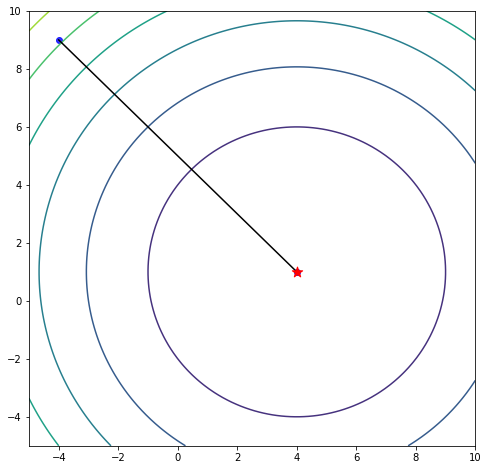

In [29]:
plot_gradient_descent_step(minis2)

### 4. with $\alpha$

In [30]:
def gradient_descent_alpha(f, x0, tol=1e-5, num_epochs=100):
    x = np.zeros([num_epochs, 2])
    x[0] = x0
    alpha = 0.1
    for k in range(num_epochs - 1):
        g = lambda t: f((x[k] - t *  f_grad(x[k]))[0])
        t_r = optimize.minimize_scalar(g, bracket=(-10, -9))
        x[k+1] = x[k] - alpha * t_r['x'] * f_grad(x[k])
        if np.linalg.norm(f_grad(x[k+1])) < tol:
            print("The number of iteration: {}".format(k + 1))
            break
        
        if (k+1) > 1000 and (k+1) % 1000 ==0:
            print(k+1, x[k+1])
    return x[k+1], x[0:k+2]

In [31]:
mini3_1, minis3_1 = gradient_descent_alpha(f, np.array([-4, -4]), num_epochs=150)
mini3_1

The number of iteration: 138


array([3.99999612, 0.99999758])

different inital values:

In [32]:
mini3_2, minis3_2 = gradient_descent_alpha(f, np.array([-4, 9]), num_epochs=150)
mini3_2

The number of iteration: 139


array([3.99999651, 1.00000349])

In [33]:
mini3_3, minis3_3 = gradient_descent_alpha(f, np.array([9, -4]), num_epochs=150)
mini3_3

The number of iteration: 135


array([4.00000332, 0.99999668])

In [34]:
mini3_4, minis3_4 = gradient_descent_alpha(f, np.array([9, 9]), num_epochs=150)
mini3_4

The number of iteration: 138


array([4.00000242, 1.00000388])

#### Visulization

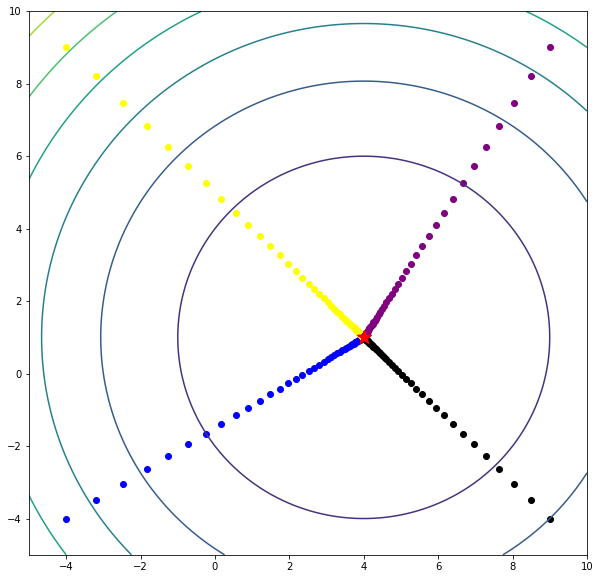

In [36]:
# put it all together: 1.(-4,-4), 2.(-4, 9), 3.(9,-4), 4.(9,9)

plt.figure(figsize=(10, 10))
plt.contour(X, Y, Z)
for i, mini in enumerate(minis3_1):
    if i == len(minis3_1)-1:
        plt.scatter(mini[0], mini[1], c='red', marker="*", s=200)
        break
    plt.scatter(mini[0], mini[1], c='blue')
    
for i, mini in enumerate(minis3_2):
    if i == len(minis3_2)-1:
        plt.scatter(mini[0], mini[1], c='red', marker="*", s=200)
        break
    plt.scatter(mini[0], mini[1], c='yellow')
    
for i, mini in enumerate(minis3_3):
    if i == len(minis3_3)-1:
        plt.scatter(mini[0], mini[1], c='red', marker="*", s=200)
        break
    plt.scatter(mini[0], mini[1], c='black')
    
for i, mini in enumerate(minis3_4):
    if i == len(minis3_4)-1:
        plt.scatter(mini[0], mini[1], c='red', marker="*", s=200)
        break
    plt.scatter(mini[0], mini[1], c='purple')

plt.show()

In [37]:
plt3d.clear()
plt3d.figure(width=600, height=800)
plt3d.plot_surface(X, Z, Y, color="green")
for i, m in enumerate(minis3_1):
    if i == len(minis3_1)-1:
        plt3d.scatter(np.array([mini3_1[0]]), np.array([f(mini3_1)]), np.array([mini3_1[1]]), 
                 size=3, marker="diamond", color='red')
        break
    plt3d.scatter(np.array([m[0]]), np.array([f(m)]), np.array([m[1]]), 
                 size=2, marker="sphere", color='blue')

for i, m in enumerate(minis3_2):
    if i == len(minis3_2)-1:
        plt3d.scatter(np.array([mini3_2[0]]), np.array([f(mini3_2)]), np.array([mini3_2[1]]), 
                 size=3, marker="diamond", color='red')
        break
    plt3d.scatter(np.array([m[0]]), np.array([f(m)]), np.array([m[1]]), 
                 size=2, marker="sphere", color='yellow')

for i, m in enumerate(minis3_3):
    if i == len(minis3_3)-1:
        plt3d.scatter(np.array([mini3_3[0]]), np.array([f(mini3_3)]), np.array([mini3_3[1]]), 
                 size=3, marker="diamond", color='red')
        break
    plt3d.scatter(np.array([m[0]]), np.array([f(m)]), np.array([m[1]]), 
                 size=2, marker="sphere", color='black')
    
for i, m in enumerate(minis3_4):
    if i == len(minis3_4)-1:
        plt3d.scatter(np.array([mini3_4[0]]), np.array([f(mini3_4)]), np.array([mini3_4[1]]), 
                 size=3, marker="diamond", color='red')
        break
    plt3d.scatter(np.array([m[0]]), np.array([f(m)]), np.array([m[1]]), 
                 size=2, marker="sphere", color='purple')
    
plt3d.zlabel("y")
plt3d.ylabel("z")
plt3d.show()

### Using `Scipy`

In [38]:
x_opt = optimize.minimize(f, (0, 0))
x_opt

      fun: 100.00000000000513
 hess_inv: array([[ 0.52941168, -0.11764665],
       [-0.11764665,  0.97058844]])
      jac: array([0.00000000e+00, 4.76837158e-06])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([3.99999997, 1.00000227])